In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [133]:
data = pd.read_csv(r'car_age_price.csv')

In [134]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [135]:
data.shape

(112, 2)

In [136]:
data.columns

Index(['Year', 'Price'], dtype='object')

In [137]:
data.isna().sum()

,0
Year,0
Price,0


In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [139]:
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [140]:
data_sorted = data.sort_values(by='Year')

In [141]:
data_sorted

,Year,Price
53,2013,345000
50,2013,325000
52,2013,345000
73,2013,320000
58,2014,450000
...,...,...
1,2019,755000
39,2020,545000
98,2020,700000
99,2020,600000


In [142]:
def find_outliers(df, column_name):
  Q1 = data_sorted['Price'].quantile(0.25)
  Q3 = data_sorted['Price'].quantile(0.75)
  iqr = Q3 - Q1
  lower_bound = Q1 - 1.5 * iqr
  upper_bound = Q3 + 1.5 * iqr
  print("Lower bound: ",lower_bound)
  print("Upper bound: ",upper_bound)

find_outliers(data_sorted['Price'],'Price')

Lower bound:  234375.0
Upper bound:  739375.0


In [143]:
filtered_df = data_sorted[data_sorted['Price'] > 739375.0]

filtered_df

,Year,Price
1,2019,755000


In [144]:
filtered_df1 = data_sorted[data_sorted['Price'] < 234375.0]

filtered_df1

,Year,Price


In [145]:
data_sorted['Price'] = data_sorted['Price'].clip(upper = 739375.0)

In [146]:
data_sorted

,Year,Price
53,2013,345000
50,2013,325000
52,2013,345000
73,2013,320000
58,2014,450000
...,...,...
1,2019,739375
39,2020,545000
98,2020,700000
99,2020,600000


In [147]:
data_sorted['Year'].nunique()

8

In [148]:
data_sorted['Year'].value_counts()

,count
Year,
2017,47
2015,22
2019,12
2018,11
2014,6
2016,6
2013,4
2020,4


In [149]:
corr_matrix = data_sorted.corr() # positive correlation.so we can do modelling
corr_matrix

,Year,Price
Year,1.000000,0.777568
Price,0.777568,1.000000


In [150]:
x = data_sorted.drop('Price',axis=1)
y = data_sorted['Price']

In [151]:
data_sorted.head()

,Year,Price
53,2013,345000
50,2013,325000
52,2013,345000
73,2013,320000
58,2014,450000


In [152]:
data_sorted = data_sorted.reset_index(drop=True)
data_sorted

,Year,Price
0,2013,345000
1,2013,325000
2,2013,345000
3,2013,320000
4,2014,450000
...,...,...
107,2019,739375
108,2020,545000
109,2020,700000
110,2020,600000


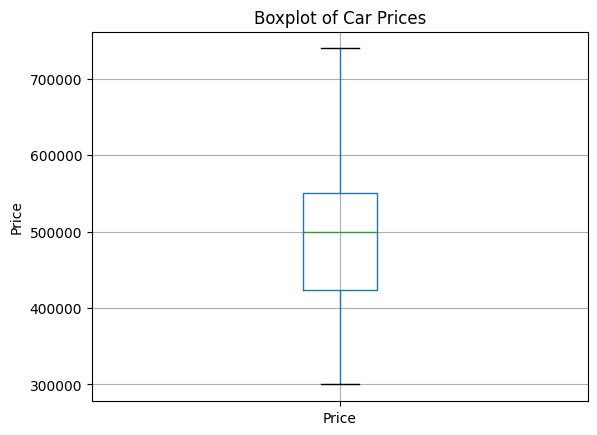

In [153]:
data_sorted.boxplot(column='Price')

plt.title('Boxplot of Car Prices')
plt.ylabel('Price')
plt.show()

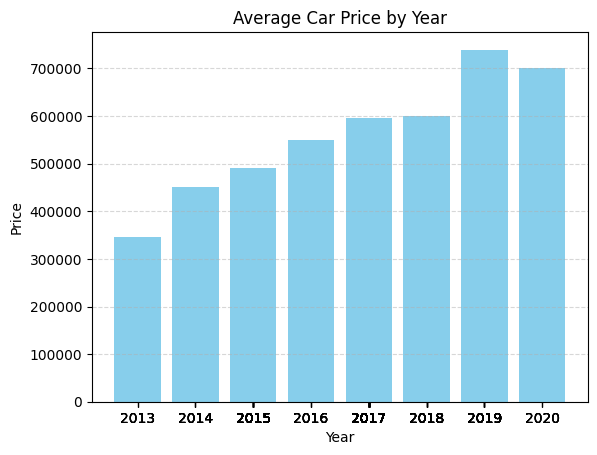

In [154]:
plt.bar(data_sorted['Year'], data_sorted['Price'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Average Car Price by Year')
plt.xticks(data_sorted['Year'])
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

In [155]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,random_state = 42)

In [156]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr = LinearRegression()
model = lr.fit(x_train,y_train)
predictions = model.predict(x_test)
mse_lr = mean_squared_error(y_test, predictions)
r2_score_lr = r2_score(y_test, predictions)
print('Meansquared error:',mse_lr)
print('R2 score:',r2_score_lr)
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)

Meansquared error: 1907903652.1459968
R2 score: 0.6204814494500643
Coefficients: [44366.13182826]
Intercept: -88990494.72021767


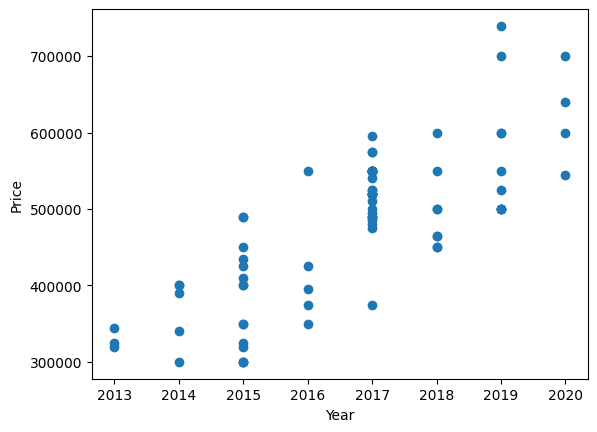

In [157]:
plt.scatter(x_train,y_train)
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

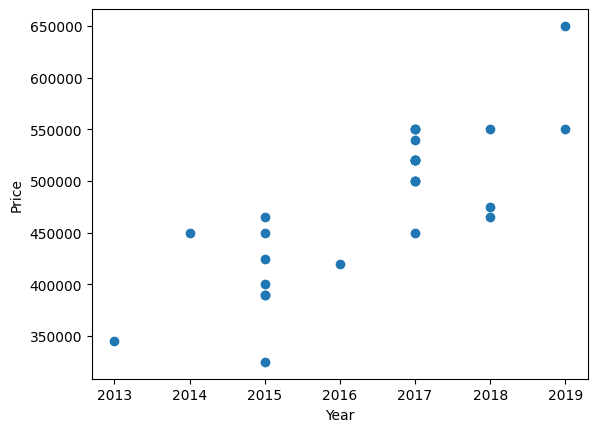

In [158]:
plt.scatter(x_test,y_test)
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

In [159]:
future_year = [[2022]]
predicted_price = model.predict(future_year)
predicted_price[0]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(717823.8365248889)

Lasso Regression is a linear regression that uses L1 regularization.

In [160]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=1000)
model.fit(x_train, y_train)
y_pred_lasso = model.predict(x_test)




In [161]:
predicted_price1 = model.predict([[2022]])
predicted_price1

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([715952.84277363])

In [162]:
mse = mean_squared_error(y_test, y_pred_lasso)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print("Mean Squared Error:",mse)
print("R²:", r2_score_lasso)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 1899946609.982536
R²: 0.6220642574210773
Coefficients: [44010.55835517]
Intercept: -88273396.15138076


In [163]:
print("Linear Regression:")
print("  MSE:", mse_lr)
print("  R²:", r2_score_lr)
print("  Coefficients:", lr.coef_)
print("  Intercept:", lr.intercept_)

print("Lasso Regression:")
print("  MSE:", mse)
print("  R²:", r2_score_lasso)
print("  Coefficients:", model.coef_)
print("  Intercept:", model.intercept_)

Linear Regression:
  MSE: 1907903652.1459968
  R²: 0.6204814494500643
  Coefficients: [44366.13182826]
  Intercept: -88990494.72021767
Lasso Regression:
  MSE: 1899946609.982536
  R²: 0.6220642574210773
  Coefficients: [44010.55835517]
  Intercept: -88273396.15138076


Lasso regression is better than Linear Regression as MSE is lesser for Lasso regression .
Both are moderate fits looking at the R2 score.
Predicted price of a 2022 model second-hand
grand i10 using Lasso regression ==> INR 715952.84277363